<a href="https://colab.research.google.com/github/rajan-dhinoja/AI_ML_Course/blob/main/Part-1%20-%20Data%20Preprocessing/Step-A%20-%20Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.sparse
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

In [2]:
%%javascript
IPython.notebook.set_autosave_interval(10000)  // Auto-save every 10 seconds

<IPython.core.display.Javascript object>

## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/salary_data.csv'))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearsExperience,Salary
0,1.10,"39,343.00"
1,1.30,"46,205.00"
2,1.50,"37,731.00"
3,2.00,"43,525.00"
4,2.20,"39,891.00"


In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("No Categorical Columns Found...")
else:
  print("Categorical Columns: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("No Numerical Columns Found...")
else:
  print("Numerical Columns: \n", numerical_cols)

No Categorical Columns Found...
Numerical Columns: 
 Index(['YearsExperience', 'Salary'], dtype='object')


In [5]:
print("> Shape of the Dataset: \n", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
print(dataset.describe().map(lambda x: round(x, 4)))

> Shape of the Dataset: 
 (30, 2) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None 

> Statistical summary of the Dataset:
       YearsExperience     Salary
count            30.00      30.00
mean              5.31  76,003.00
std               2.84  27,414.43
min               1.10  37,731.00
25%               3.20  56,720.75
50%               4.70  65,237.00
75%               7.70 100,544.75
max              10.50 122,391.00


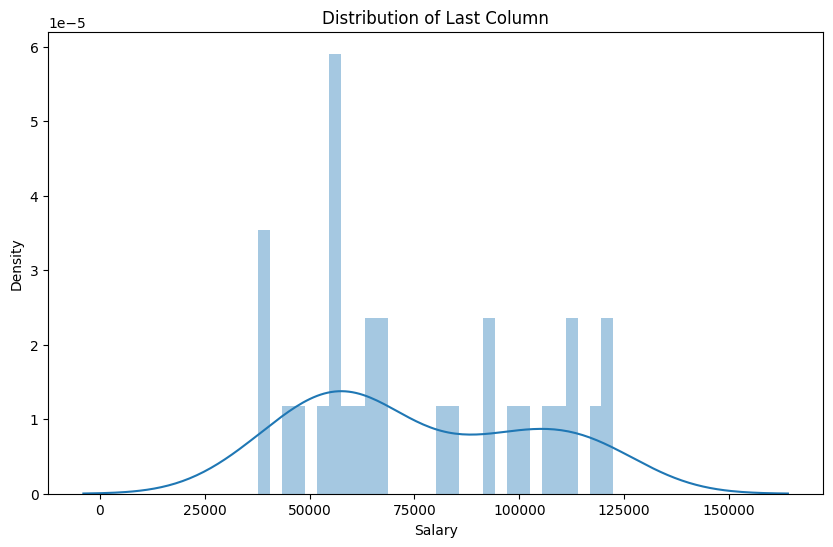

In [6]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

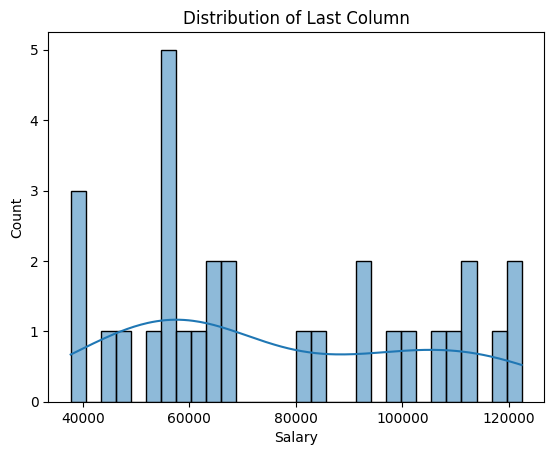

In [7]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

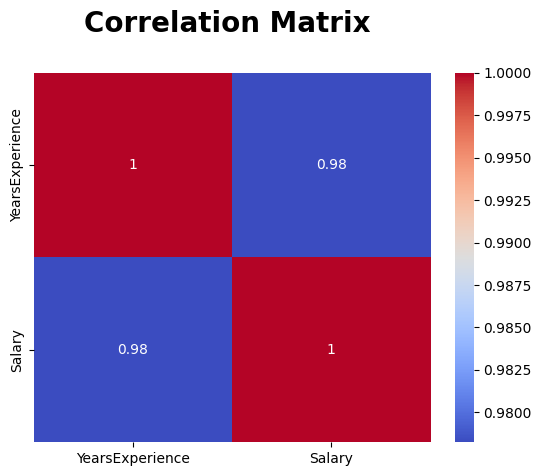

In [8]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

In [9]:
# # Boxplot for OutletType vs OutletSales
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='OutletType', y='OutletSales', data=dataset)
# plt.xticks(rotation=45)
# plt.title('OutletType vs OutletSales')
# plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [10]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("No Duplicate Data(or Identical Rows) found...")

No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [11]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("No missing data found.")



No missing data found.


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [12]:
for col in dataset.columns:
  # Get value counts and convert to DataFrame with column name
  # .reset_index(name='Counts: '): This converts the Series into a DataFrame and names the count column as 'Counts: '.
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  # Transpose and print with formatting
  print(f"Column: \t'{col}'")
  # .to_string(header=False): This converts the transposed DataFrame to a string for printing and removes the header row.
  print(value_counts_dataset.T.to_string(header=False), "\n")


Column: 	'YearsExperience'
Unique Values:  3.20 4.00 1.10 5.30 10.30 9.60 9.50 9.00 8.70 8.20 7.90 7.10 6.80 6.00 5.90 5.10 1.30 4.90 4.50 4.10 3.90 3.70 3.00 2.90 2.20 2.00 1.50 10.50
Counts:         2.00 2.00 1.00 1.00  1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00  1.00 

Column: 	'Salary'
Unique Values:  39,343.00 46,205.00 122,391.00 112,635.00 116,969.00 105,582.00 109,431.00 113,812.00 101,302.00 98,273.00 91,738.00 93,940.00 81,363.00 83,088.00 66,029.00 67,938.00 61,111.00 57,081.00 56,957.00 55,794.00 63,218.00 57,189.00 64,445.00 54,445.00 60,150.00 56,642.00 39,891.00 43,525.00 37,731.00 121,872.00
Counts:              1.00      1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00      1.00 

### Step-3.4: Checking for Stopwords and Stemming them:-

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

if categorical_cols.any():
  nltk.download('stopwords')

  stop_words = set(stopwords.words('english'))

  stemmer = PorterStemmer()

  def stemming(text):
      words = text.lower().split()
      stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
      return ' '.join(stemmed_words)  # Join stemmed words back into a string

  # Apply the stemming function to the specified columns
  for column in categorical_cols:
      dataset[column] = dataset[column].astype(str).apply(stemming)

  print("\n > Stemming Completed... \n")
  print(dataset.head().to_string(header=True))
else:
  print("No Stemming Needed...")

No Stemming Needed...


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [14]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []
for col in categorical_cols:
    # Matrix of Feature
    if col != dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t-'{col}' is Encoded Successfully...\n")

      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

    # Dependent Variable/Output
    if col == dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'(Output Column).")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
        le = LabelEncoder()
        y = le.fit_transform(dataset[col])
        print(f"\t-'{col}' is Encoded Successfully...\n")
      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
if repeating_cols:
  encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
  encoder_transform = encoder.fit_transform(X)

  # Conditional conversion to dense array
  if scipy.sparse.issparse(encoder_transform):  # Check if sparse
    X = encoder_transform.toarray()
  else:
    X = encoder_transform

else:
  print("No Repeating Columns found in Matrix of Features(X). \n")

print("Matrix of Features(X): \n", X)
print("\n")
print("Dependent Variable(y): \n", y)


=> Repeating Columns in Matrix of Features(X):  [] 

No Repeating Columns found in Matrix of Features(X). 

Matrix of Features(X): 
     YearsExperience
0              1.10
1              1.30
2              1.50
3              2.00
4              2.20
5              2.90
6              3.00
7              3.20
8              3.20
9              3.70
10             3.90
11             4.00
12             4.00
13             4.10
14             4.50
15             4.90
16             5.10
17             5.30
18             5.90
19             6.00
20             6.80
21             7.10
22             7.90
23             8.20
24             8.70
25             9.00
26             9.50
27             9.60
28            10.30
29            10.50


Dependent Variable(y): 
 [39,343.00 46,205.00 37,731.00 43,525.00 39,891.00 56,642.00 60,150.00
 54,445.00 64,445.00 57,189.00 63,218.00 55,794.00 56,957.00 57,081.00
 61,111.00 67,938.00 66,029.00 83,088.00 81,363.00 93,940.00 91,738.00
 98,273

## Step-4: Split the Dataset into the Training set and Test set:-

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Printing Training Sets: ")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test, "\n")

print("\n")

print("Printing Test Sets: ")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

Printing Training Sets: 
> X_train: 
     YearsExperience
28            10.30
24             8.70
12             4.00
0              1.10
4              2.20
16             5.10
5              2.90
13             4.10
11             4.00
22             7.90
1              1.30
2              1.50
25             9.00
3              2.00
21             7.10
26             9.50
18             5.90
29            10.50
20             6.80
7              3.20
10             3.90
14             4.50
19             6.00
6              3.00
> X_test: 
     YearsExperience
27             9.60
15             4.90
23             8.20
17             5.30
8              3.20
9              3.70 



Printing Test Sets: 
> y_train: 
 [122,391.00 109,431.00 56,957.00 39,343.00 39,891.00 66,029.00 56,642.00
 57,081.00 55,794.00 101,302.00 46,205.00 37,731.00 105,582.00 43,525.00
 98,273.00 116,969.00 81,363.00 121,872.00 91,738.00 54,445.00 63,218.00
 61,111.00 93,940.00 60,150.00]
> y_test: 
 [112,635.

## Step-5: Feature Scaling:-

In [16]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = sc.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = sc.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("Printing Training Sets after Feature Scaling:")
print("> X_train: \n", X_train)
print("\n")
print("Printing Test Sets after Feature Scaling:")
print("> X_test: \n", X_test)

Printing Training Sets after Feature Scaling:
> X_train: 
 [[1.77]
 [1.22]
 [-0.41]
 [-1.42]
 [-1.04]
 [-0.03]
 [-0.79]
 [-0.38]
 [-0.41]
 [0.94]
 [-1.35]
 [-1.28]
 [1.32]
 [-1.11]
 [0.66]
 [1.50]
 [0.25]
 [1.84]
 [0.56]
 [-0.69]
 [-0.45]
 [-0.24]
 [0.28]
 [-0.76]]


Printing Test Sets after Feature Scaling:
> X_test: 
 [[1.53]
 [-0.10]
 [1.05]
 [0.04]
 [-0.69]
 [-0.52]]
